In [2]:
#pip install yfinance

In [3]:
#pip install xgboost


In [44]:
#pip install keras

  Obtaining dependency information for keras from https://files.pythonhosted.org/packages/8d/44/c604ecc5c9993b6574a681f2f505e980725871a89cfd9e48597b12ccb506/keras-3.3.3-py3-none-any.whl.metadata
  Obtaining dependency information for absl-py from https://files.pythonhosted.org/packages/a2/ad/e0d3c824784ff121c03cc031f944bc7e139a8f1870ffd2845cc2dd76f6c4/absl_py-2.1.0-py3-none-any.whl.metadata
  Obtaining dependency information for rich from https://files.pythonhosted.org/packages/87/67/a37f6214d0e9fe57f6ae54b2956d550ca8365857f42a1ce0392bb21d9410/rich-13.7.1-py3-none-any.whl.metadata
  Obtaining dependency information for namex from https://files.pythonhosted.org/packages/73/59/7854fbfb59f8ae35483ce93493708be5942ebb6328cd85b3a609df629736/namex-0.0.8-py3-none-any.whl.metadata
  Obtaining dependency information for optree from https://files.pythonhosted.org/packages/8f/db/e05a35451d4ba30fdc65ef168dfdc68a6939ea6afdc0101e3e77f97e1547/optree-0.11.0-cp311-cp311-win_amd64.whl.metadata
     -----

In [45]:
#pip install tensorflow



  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/e4/14/d795bb156f8cc10eb1dcfe1332b7dbb8405b634688980aa9be8f885cc888/tensorflow-2.16.1-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for tensorflow-intel==2.16.1 from https://files.pythonhosted.org/packages/e0/36/6278e4e7e69a90c00e0f82944d8f2713dd85a69d1add455d9e50446837ab/tensorflow_intel-2.16.1-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for astunparse>=1.6.0 from https://files.pythonhosted.org/packages/2b/03/13dde6512ad7b4557eb792fbcf0c653af6076b81e5941d36ec61f7ce6028/astunparse-1.6.3-py2.py3-none-any.whl.metadata
  Obtaining dependency information for flatbuffers>=23.5.26 from https://files.pythonhosted.org/packages/41/f0/7e988a019bc54b2dbd0ad4182ef2d53488bb02e58694cd79d61369e85900/flatbuffers-24.3.25-py2.py3-none-any.whl.metadata
  Obtaining dependency information for gast!=0.5.0,!=0.5.1,!=0.5.2,>=0.2.1 from https://files.pythonhosted.org/

In [2]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
# from xgboost import XGBClassifier
from sklearn import metrics

In [3]:
import warnings
warnings.filterwarnings('ignore')

### Overview Of The Data

In [4]:
# Download historical data for INTEL from the beginning of 2015 until August 2023
data = yf.download("INTC", start="2015-01-01", end="2023-08-31")
data.head(10)

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,36.669998,37.160000,36.110001,36.360001,28.073425,23605600
2015-01-05,36.200001,36.450001,35.939999,35.950001,27.756866,32785000
2015-01-06,36.080002,36.230000,35.259998,35.279999,27.239557,30847600
2015-01-07,35.639999,36.070000,35.270000,36.020000,27.810905,27725200
2015-01-08,36.369999,37.000000,36.259998,36.689999,28.328213,31765400
2015-01-09,36.770000,37.110001,36.400002,36.759998,28.382261,22850500
2015-01-12,36.900002,37.000000,36.230000,36.599998,28.258722,29400800
2015-01-13,36.869999,37.490002,36.290001,36.500000,28.181511,31478000
2015-01-14,36.330002,36.910000,35.910000,36.349998,28.065693,34250300


In [5]:
data.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [6]:
data.shape

(2180, 6)

In [7]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2180.000000,2180.000000,2180.000000,2180.000000,2180.000000,2.180000e+03
mean,43.121670,43.620266,42.633151,43.135449,37.920638,2.957288e+07
std,10.597827,10.734310,10.453737,10.590621,10.204500,1.487568e+07
min,24.730000,25.120001,24.590000,24.900000,20.431206,5.893800e+06
25%,33.825000,34.247500,33.507499,33.910000,28.531289,2.003278e+07
50%,44.594999,45.105000,44.000000,44.565001,38.768417,2.618175e+07
75%,51.660001,52.169998,51.067501,51.689999,46.018637,3.501972e+07
max,68.199997,69.290001,67.309998,68.470001,62.477165,1.822699e+08


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2180 entries, 2015-01-02 to 2023-08-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2180 non-null   float64
 1   High       2180 non-null   float64
 2   Low        2180 non-null   float64
 3   Close      2180 non-null   float64
 4   Adj Close  2180 non-null   float64
 5   Volume     2180 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 119.2 KB


In [9]:
print(data.isnull().sum())

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [10]:
# Assuming 'data' is your DataFrame
min_date = data.index.min()
max_date = data.index.max()

print("Minimum date:", min_date)
print("Maximum date:", max_date)

Minimum date: 2015-01-02 00:00:00
Maximum date: 2023-08-30 00:00:00


### Visualisation of the data

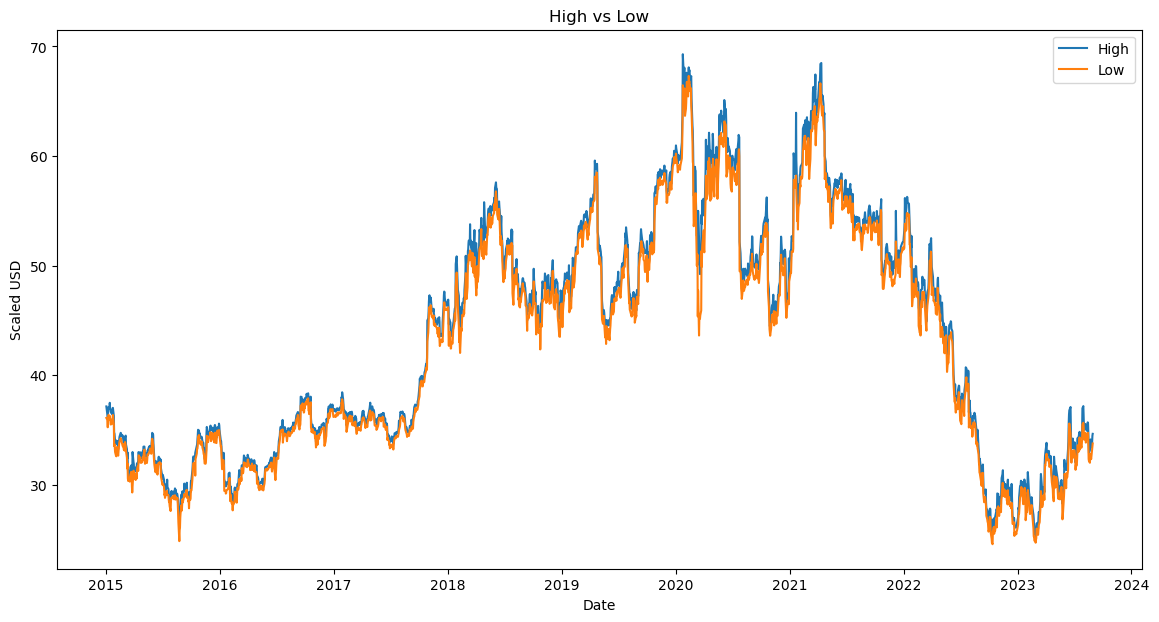

In [11]:
plt.figure(figsize=(14, 7))
plt.plot(data['High'], label='High')
plt.plot(data['Low'], label='Low')
plt.title('High vs Low')
plt.xlabel('Date')
plt.ylabel('Scaled USD')
plt.legend()
plt.show()

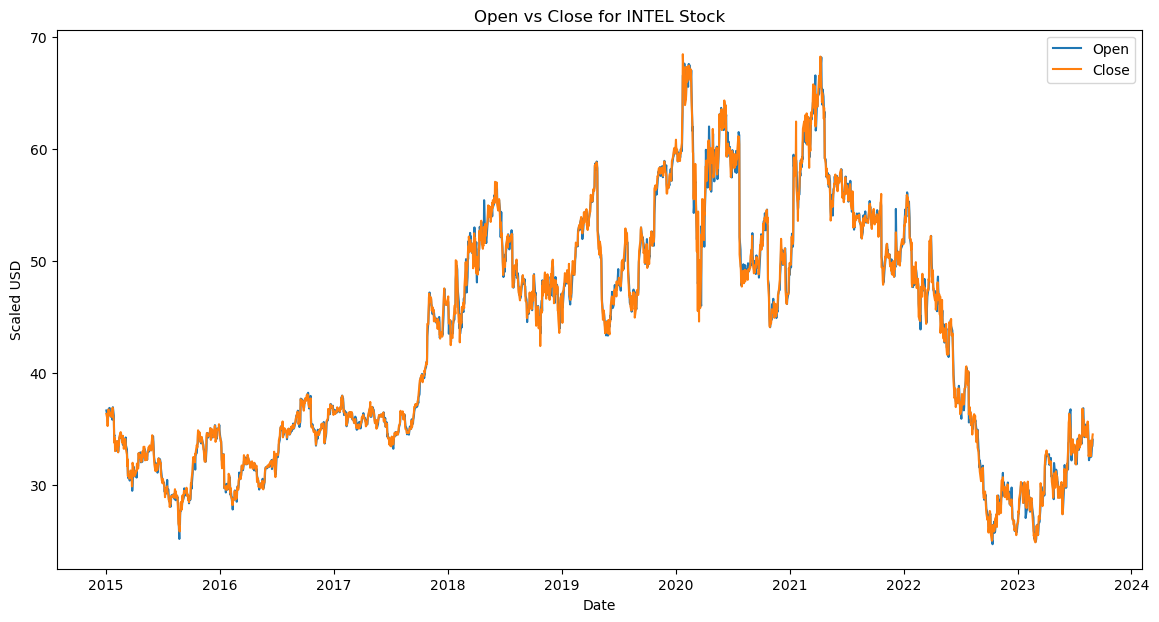

In [12]:
plt.figure(figsize=(14, 7))
plt.plot(data['Open'], label='Open')
plt.plot(data['Close'], label='Close')
plt.title('Open vs Close for INTEL Stock')
plt.xlabel('Date')
plt.ylabel('Scaled USD')
plt.legend()
plt.show()

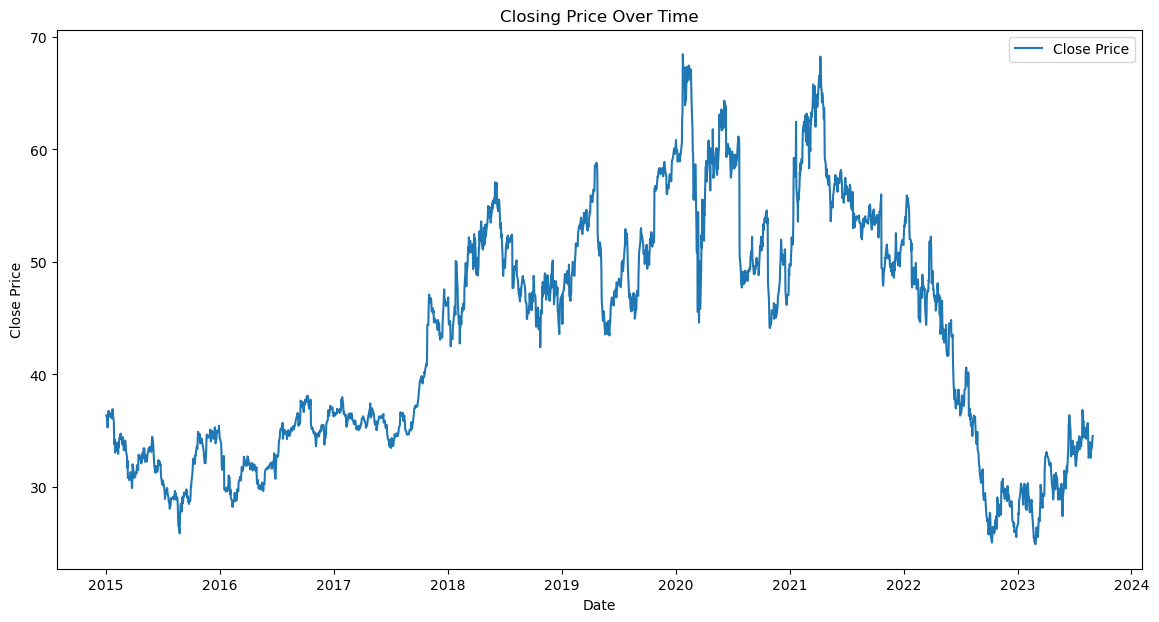

In [13]:
plt.figure(figsize=(14, 7))
plt.plot(data['Close'], label='Close Price')
plt.title('Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

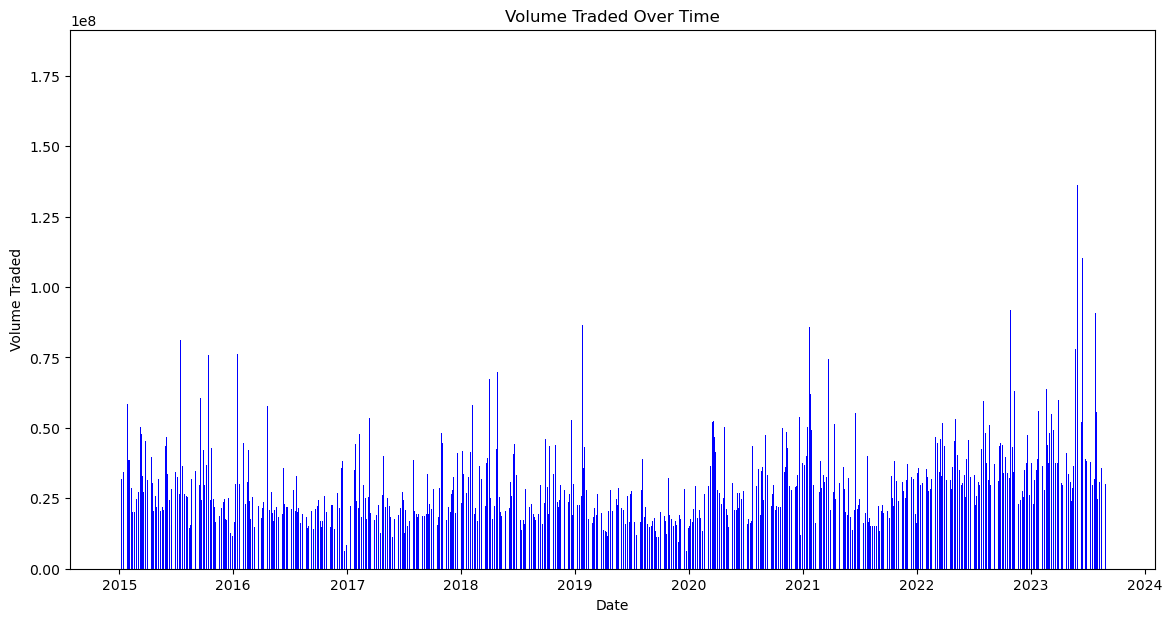

In [14]:
plt.figure(figsize=(14, 7))
plt.bar(data.index, data['Volume'], color='blue')
plt.title('Volume Traded Over Time')
plt.xlabel('Date')
plt.ylabel('Volume Traded')
plt.show()

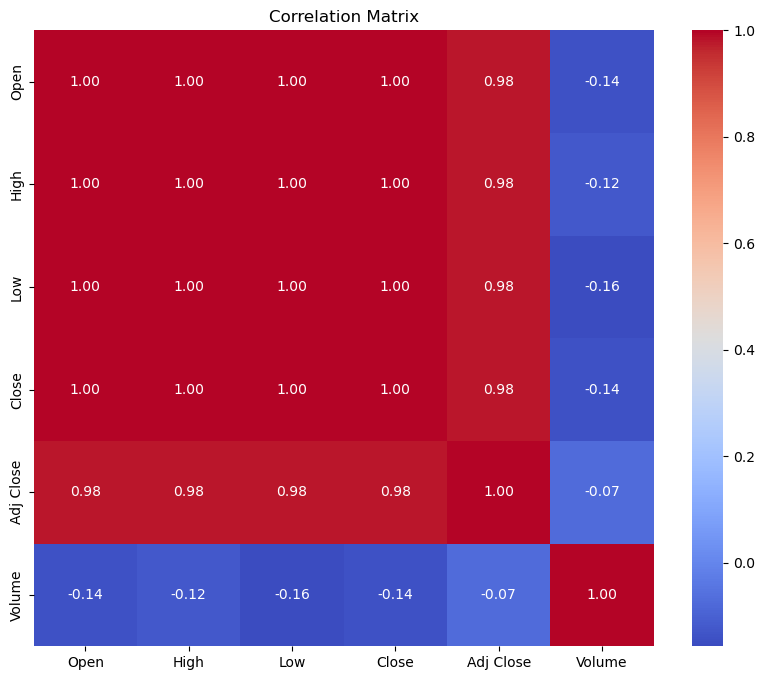

In [15]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

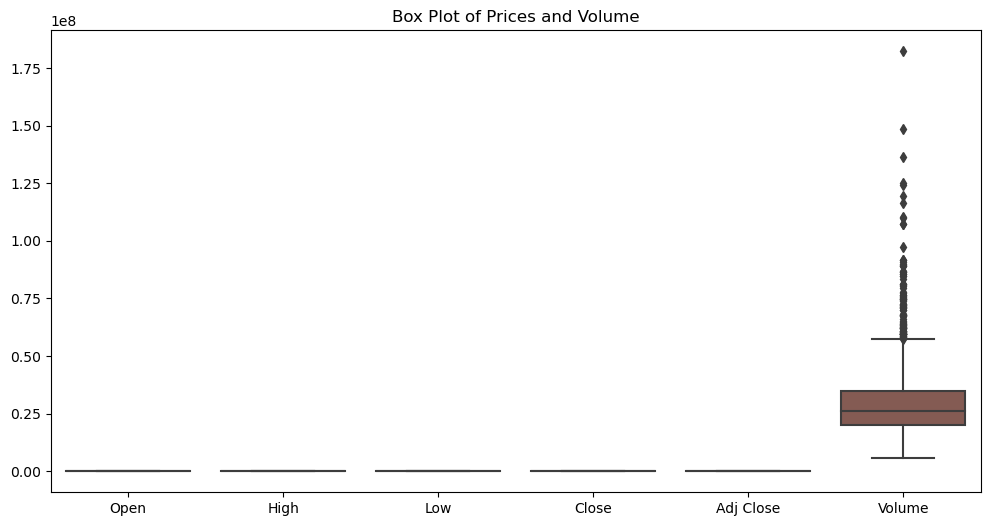

In [16]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data)
plt.title('Box Plot of Prices and Volume')
plt.show()
#RED ALERT#

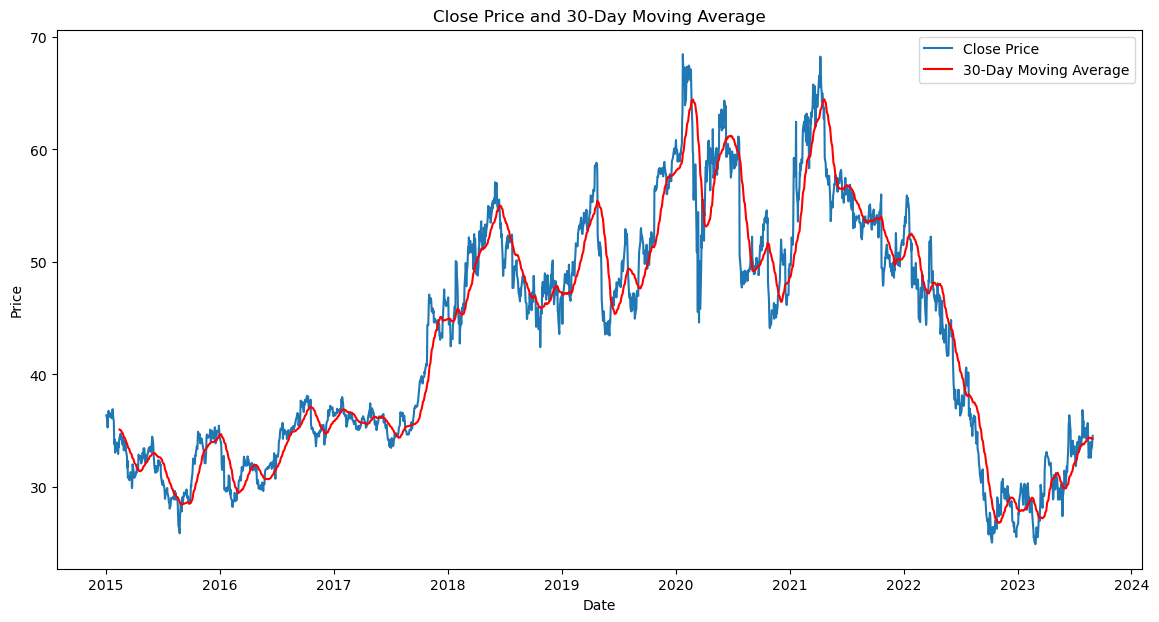

In [17]:
data['MA30'] = data['Close'].rolling(window=30).mean()
plt.figure(figsize=(14, 7))
plt.plot(data['Close'], label='Close Price')
plt.plot(data['MA30'], label='30-Day Moving Average', color='red')
plt.title('Close Price and 30-Day Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

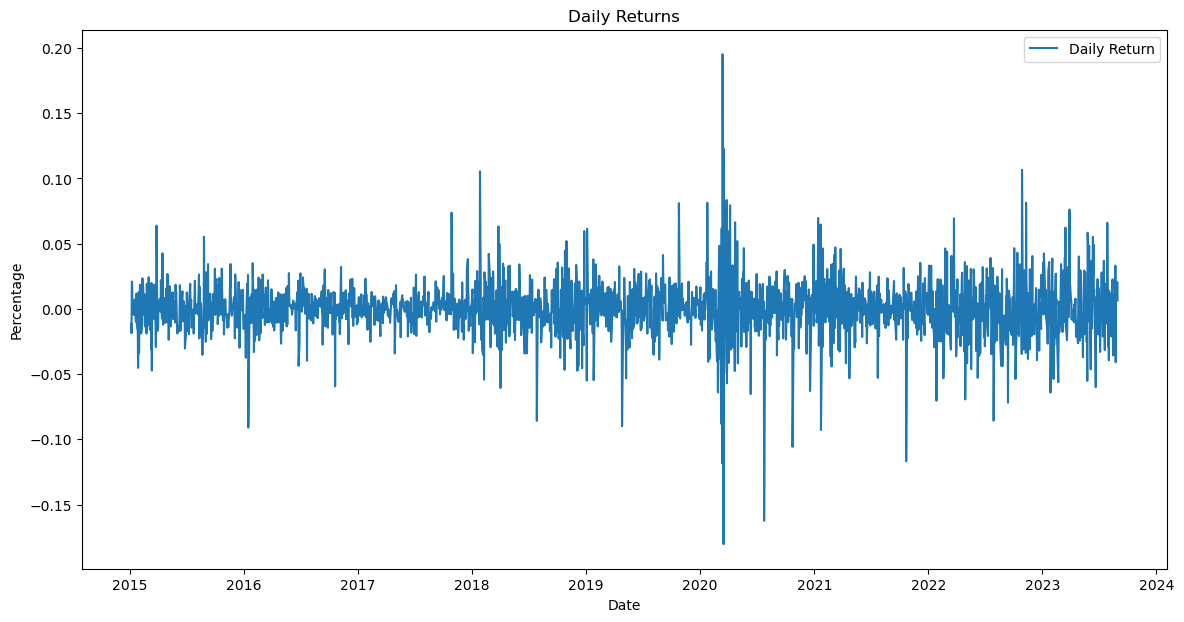

In [18]:
# Calculating daily returns
data['Daily Return'] = data['Close'].pct_change()
# Plotting the daily returns
plt.figure(figsize=(14, 7))
plt.plot(data['Daily Return'], label='Daily Return')
plt.title('Daily Returns')
plt.xlabel('Date')
plt.ylabel('Percentage')
plt.legend()
plt.show()

In [19]:
# Create a function for strategy 1: Buy (1) if the next day's close price is greater, otherwise Sell (-1)
def strategy_1(data):
    data['Signal_1'] = np.where(data['Close'].shift(-1) > data['Close'], 1, -1)
    return data

In [20]:
# Create a function for strategy 2: Golden Cross (1) and Death Cross (-1)
def strategy_2(data):
    data['50MA'] = data['Close'].rolling(window=50).mean()
    data['200MA'] = data['Close'].rolling(window=200).mean()
    data['Signal_2'] = np.where(data['50MA'] > data['200MA'], 1, -1)
    return data

In [21]:
data

,Open,High,Low,Close,Adj Close,Volume,MA30,Daily Return
Date,,,,,,,,
2015-01-02,36.669998,37.160000,36.110001,36.360001,28.073425,23605600,NaN,NaN
2015-01-05,36.200001,36.450001,35.939999,35.950001,27.756866,32785000,NaN,-0.011276
2015-01-06,36.080002,36.230000,35.259998,35.279999,27.239557,30847600,NaN,-0.018637
2015-01-07,35.639999,36.070000,35.270000,36.020000,27.810905,27725200,NaN,0.020975
2015-01-08,36.369999,37.000000,36.259998,36.689999,28.328213,31765400,NaN,0.018601
...,...,...,...,...,...,...,...,...
2023-08-24,33.720001,34.090000,32.490002,32.590000,32.257233,37931000,34.310667,-0.040906
2023-08-25,32.529999,33.400002,32.349998,33.250000,32.910496,27324800,34.314000,0.020252
2023-08-28,33.500000,33.779999,33.209999,33.619999,33.276718,22341800,34.289000,0.011128


In [22]:
# Apply strategy 1
data = strategy_1(data)
# Apply strategy 2
data = strategy_2(data)

In [23]:
# Drop rows with NaN values in '50_MA' and '200_MA'
data.dropna(subset=['50MA', '200MA'], inplace=True)

In [24]:
# Checking for null values
data.isna().sum()

Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
MA30            0
Daily Return    0
Signal_1        0
50MA            0
200MA           0
Signal_2        0
dtype: int64

In [25]:
#Decribing the data stats
data.describe()

,Open,High,Low,Close,Adj Close,Volume,MA30,Daily Return,Signal_1,50MA,200MA,Signal_2
count,1981.000000,1981.000000,1981.000000,1981.000000,1981.000000,1.981000e+03,1981.000000,1981.000000,1981.000000,1981.000000,1981.000000,1981.000000
mean,44.277991,44.790505,43.772206,44.290379,39.245780,2.929913e+07,44.266977,0.000258,0.021706,44.240638,44.234911,-0.008582
std,10.410312,10.546884,10.270485,10.404346,9.749582,1.501848e+07,10.238181,0.021442,1.000017,10.165714,9.531655,1.000216
min,24.730000,25.120001,24.590000,24.900000,22.641695,5.893800e+06,26.793000,-0.180415,-1.000000,27.747400,28.921850,-1.000000
25%,34.950001,35.200001,34.680000,34.950001,29.622040,1.963220e+07,34.918334,-0.009194,-1.000000,35.064800,34.898600,-1.000000
50%,46.099998,46.639999,45.520000,46.110001,40.596893,2.570990e+07,46.787666,0.000471,1.000000,46.922400,48.510200,-1.000000
75%,52.250000,52.959999,51.610001,52.250000,46.639782,3.489330e+07,52.246333,0.010496,1.000000,52.248800,53.388400,1.000000
max,68.199997,69.290001,67.309998,68.470001,62.477165,1.822699e+08,64.458667,0.195213,1.000000,63.169400,58.585250,1.000000


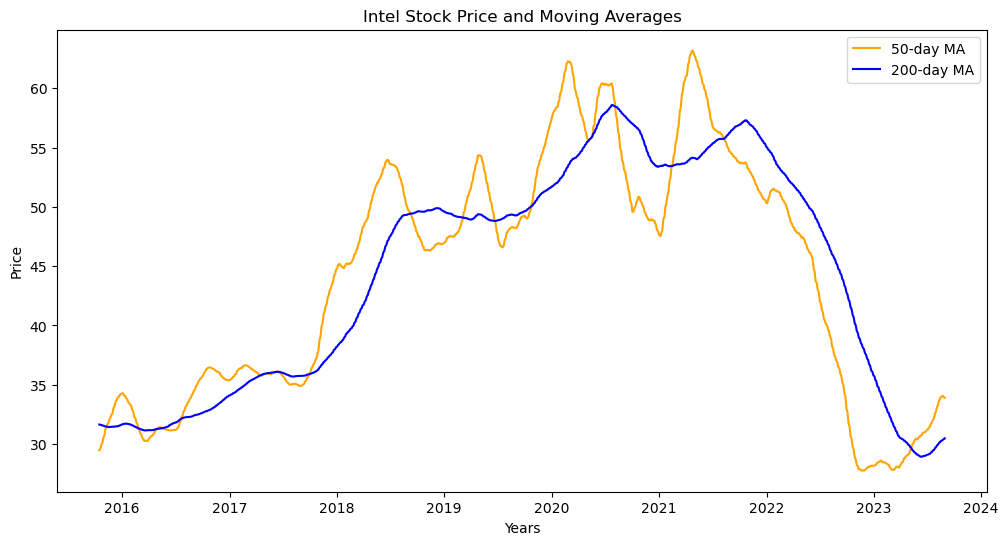

In [26]:
# Visualization
# Create a figure and axis (subplots) with Seaborn
plt.figure(figsize=(12, 6))

# Plotting Intel Close Price using Seaborn
# sns.lineplot(x=data.index, y=data['Close'], label=' Close Price', color = 'green')


# Plot 50-day MA using Seaborn
sns.lineplot(x=data.index, y=data['50MA'], label='50-day MA', color = 'orange')

# Plot 200-day MA using Seaborn
sns.lineplot(x=data.index, y=data['200MA'], label='200-day MA', color = 'blue')

# Set the title and labels
plt.title('Intel Stock Price and Moving Averages')
plt.xlabel('Years')
plt.ylabel('Price')

# Show the legend
plt.legend()

# Show the plot
plt.show()

In [27]:
# Define features (X) and target (y) for Strategy 1
X1 = data[['Close', 'Open']]
y1 = data['Signal_1']

In [28]:
# Split the data into training and test sets (80/20 split)
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

In [29]:
# Initialize and train classifiers
classifiers = {
    "K-Nearest Neighbors (KNN)": KNeighborsClassifier(),
    "Random Forest Classifier (RF)": RandomForestClassifier(),
    "Gradient Boosting Classifier (GB)": GradientBoostingClassifier(),
    "Support Vector Machines (SVMs)": SVC()
}

In [30]:
from xgboost import XGBClassifier


In [70]:
# Initialize and train classifiers
classifiers = {
    "K-Nearest Neighbors (KNN)": KNeighborsClassifier(),
    "Random Forest Classifier (RF)": RandomForestClassifier(),
    "Gradient Boosting Classifier (GB)": GradientBoostingClassifier(),
    "Support Vector Machines (SVMs)": SVC()
}

for name, classifier in classifiers.items():
    classifier.fit(X1_train, y1_train)
    y_pred1 = classifier.predict(X1_test)
    accuracy = np.round(np.mean(y_pred1 == y1_test), 2)
    print(f"{name} - Accuracy: {accuracy}")

#Intializing XGBoost Classifier for strategy 1
XGB = XGBClassifier()
y1_train[y1_train == -1]=0
XGB.fit(X1_train, y1_train)
XGB_pred = XGB.predict(X1_test)
accuracy = np.round(np.mean(XGB_pred == y1_test), 2)
print(f"XGBoost Classifier Accuracy for strategy: {accuracy}")

K-Nearest Neighbors (KNN) - Accuracy: 0.29
Random Forest Classifier (RF) - Accuracy: 0.26
Gradient Boosting Classifier (GB) - Accuracy: 0.35
Support Vector Machines (SVMs) - Accuracy: 0.44
XGBoost Classifier Accuracy for strategy: 0.26


In [32]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grids for each classifier
param_grids = {
    "K-Nearest Neighbors (KNN)": {'n_neighbors': [3, 5, 7]},
    "Random Forest Classifier (RF)": {'n_estimators': [100, 200, 300],
                                      'max_depth': [None, 10, 20]},
    "Gradient Boosting Classifier (GB)": {'n_estimators': [50, 100, 150],
                                           'learning_rate': [0.05, 0.1, 0.2]},
    "Support Vector Machines (SVMs)": {'C': [0.1, 1, 10],
                                       'gamma': [0.1, 0.01, 0.001]}
}

# Perform hyperparameter tuning for each classifier
for name, classifier in classifiers.items():
    param_grid = param_grids[name]
    grid_search = GridSearchCV(classifier, param_grid, cv=3, scoring='accuracy')
    grid_search.fit(X1_train, y1_train)
    
    print(f"Best parameters for {name}: {grid_search.best_params_}")
    print(f"Best accuracy for {name}: {grid_search.best_score_}")


Best parameters for K-Nearest Neighbors (KNN): {'n_neighbors': 5}
Best accuracy for K-Nearest Neighbors (KNN): 0.49621212121212116
Best parameters for Random Forest Classifier (RF): {'max_depth': 10, 'n_estimators': 100}
Best accuracy for Random Forest Classifier (RF): 0.5069444444444445
Best parameters for Gradient Boosting Classifier (GB): {'learning_rate': 0.1, 'n_estimators': 150}
Best accuracy for Gradient Boosting Classifier (GB): 0.5164141414141414
Best parameters for Support Vector Machines (SVMs): {'C': 0.1, 'gamma': 0.001}
Best accuracy for Support Vector Machines (SVMs): 0.49873737373737376


In [33]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

# Define hyperparameter distributions for RandomizedSearchCV
param_dists = {
    "K-Nearest Neighbors (KNN)": {'n_neighbors': randint(1, 20)},
    "Random Forest Classifier (RF)": {'n_estimators': [100, 200, 300, 400],
                                      'max_depth': [None, 10, 20, 30]},
    "Gradient Boosting Classifier (GB)": {'n_estimators': randint(50, 200),
                                           'learning_rate': uniform(0.01, 0.3)},
    "Support Vector Machines (SVMs)": {'C': uniform(0.1, 10),
                                       'gamma': ['scale', 'auto']}
}

# Perform hyperparameter tuning using RandomizedSearchCV
for name, classifier in classifiers.items():
    param_dist = param_dists[name]
    random_search = RandomizedSearchCV(classifier, param_distributions=param_dist, n_iter=10, cv=3, scoring='accuracy', random_state=42)
    random_search.fit(X1_train, y1_train)
    
    print(f"Best parameters for {name}: {random_search.best_params_}")
    print(f"Best accuracy for {name}: {random_search.best_score_}")


Best parameters for K-Nearest Neighbors (KNN): {'n_neighbors': 8}
Best accuracy for K-Nearest Neighbors (KNN): 0.4955808080808081
Best parameters for Random Forest Classifier (RF): {'n_estimators': 100, 'max_depth': None}
Best accuracy for Random Forest Classifier (RF): 0.5012626262626263
Best parameters for Gradient Boosting Classifier (GB): {'learning_rate': 0.189597545259111, 'n_estimators': 152}
Best accuracy for Gradient Boosting Classifier (GB): 0.5239898989898989
Best parameters for Support Vector Machines (SVMs): {'C': 7.180725777960454, 'gamma': 'auto'}
Best accuracy for Support Vector Machines (SVMs): 0.5012626262626262


In [34]:
from sklearn.ensemble import VotingClassifier

# Define a list of base classifiers
base_classifiers = [
    ("KNN", KNeighborsClassifier()),
    ("RF", RandomForestClassifier()),
    ("GB", GradientBoostingClassifier()),
    ("SVM", SVC())
]

# Create the ensemble model using VotingClassifier
voting_classifier = VotingClassifier(estimators=base_classifiers, voting='hard')

# Train the ensemble model
voting_classifier.fit(X1_train, y1_train)

# Evaluate the ensemble model
accuracy = voting_classifier.score(X1_test, y1_test)
print(f"Ensemble Model Accuracy: {accuracy}")


Ensemble Model Accuracy: 0.27204030226700254


In [35]:
# Define features (X) and target (y) for Strategy 2
X = data[['50MA', '200MA','Close']]
y = data['Signal_2']

In [36]:
# Split the data into training and test sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
# Initialize and train classifiers
classifiers = {
    "K-Nearest Neighbors (KNN)": KNeighborsClassifier(),
    "Random Forest Classifier (RF)": RandomForestClassifier(),
    "Gradient Boosting Classifier (GB)": GradientBoostingClassifier(),
    "Support Vector Machines (SVMs)": SVC()
}

In [38]:
# Define features (X) and target (y) for Strategy 2
X = data[['50MA', '200MA','Close']]
y = data['Signal_2']

for name, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    accuracy = np.round(np.mean(y_pred == y_test), 2)
    print(f"{name} - Accuracy: {accuracy}")

#Intializing XGBoost Classifier for strategy 2
y_train[y_train == -1]=0
XGB.fit(X_train, y_train)
XGB_pred = XGB.predict(X_test)
accuracy = np.round(np.mean(XGB_pred == y_test), 2)
print(f"XGBoost Classifier Accuracy for strategy: {accuracy}")

K-Nearest Neighbors (KNN) - Accuracy: 0.98
Random Forest Classifier (RF) - Accuracy: 0.99
Gradient Boosting Classifier (GB) - Accuracy: 0.99
Support Vector Machines (SVMs) - Accuracy: 0.97
XGBoost Classifier Accuracy for strategy: 0.52


In [39]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split

def calculate_error_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    return mae, mse, rmse


# Assuming you have a DataFrame 'data' with a 'Close' column
data['returns'] = data['Close'].pct_change()


In [40]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split

# Define your classifiers
classifiers = {
    "K-Nearest Neighbors (KNN)": KNeighborsClassifier(),
    "Random Forest Classifier (RF)": RandomForestClassifier(),
    "Gradient Boosting Classifier (GB)": GradientBoostingClassifier(),
    "Support Vector Machines (SVMs)": SVC(),
    "XGBoost Classifier": XGBClassifier()
}

# Adjust labels for XGBoost or any model expecting [0, 1] labels
y_train_xgb = np.where(y_train == -1, 0, 1)
y_test_xgb = np.where(y_test == -1, 0, 1)

# Train and evaluate classifiers
for name, classifier in classifiers.items():
    if name == "XGBoost Classifier":
        # Use adjusted labels
        classifier.fit(X_train, y_train_xgb)
        y_pred = classifier.predict(X_test)
        # Convert predictions back if necessary
        y_pred = np.where(y_pred == 0, -1, 1)
    else:
        # Use original labels for other classifiers
        classifier.fit(X_train, y_train)
        y_pred = classifier.predict(X_test)

    # Calculate error metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)

    # Print the results
    print(f"{name} - MAE: {mae:.4f}, MSE: {mse:.4f}, RMSE: {rmse:.4f}")

    # For Sharpe Ratio, ensure predictions are converted into returns if that's the analysis
    # This part would need your specific returns calculation logic if applicable.


K-Nearest Neighbors (KNN) - MAE: 0.4987, MSE: 0.5088, RMSE: 0.7133
Random Forest Classifier (RF) - MAE: 0.4937, MSE: 0.5088, RMSE: 0.7133
Gradient Boosting Classifier (GB) - MAE: 0.4937, MSE: 0.5038, RMSE: 0.7098
Support Vector Machines (SVMs) - MAE: 0.5164, MSE: 0.5264, RMSE: 0.7256


ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0], got [1]

In [ ]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier



# Define your classifiers
classifiers = {
    "K-Nearest Neighbors (KNN)": KNeighborsClassifier(),
    "Random Forest Classifier (RF)": RandomForestClassifier(),
    "Gradient Boosting Classifier (GB)": GradientBoostingClassifier(),
    "Support Vector Machines (SVMs)": SVC(),
    "XGBoost Classifier": XGBClassifier()
}

# Adjust labels for XGBoost or any model expecting [0, 1] labels
y_train_xgb = np.where(y_train == -1, 0, y_train)
y_test_xgb = np.where(y_test == -1, 0, y_test)

# Ensure that both classes are present in the training set for XGBoost
assert len(np.unique(y_train_xgb)) == 2, "Training set does not contain both classes after conversion."

# Train and evaluate classifiers
for name, classifier in classifiers.items():
    if name == "XGBoost Classifier":
        # Use adjusted labels
        classifier.fit(X_train, y_train_xgb)
        y_pred = classifier.predict(X_test)
        # Convert predictions back if necessary
        y_pred = np.where(y_pred == 0, -1, y_pred)
    else:
        # Use original labels for other classifiers
        classifier.fit(X_train, y_train)
        y_pred = classifier.predict(X_test)

    # Calculate error metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)

    # Print the results
    print(f"{name} - MAE: {mae:.4f}, MSE: {mse:.4f}, RMSE: {rmse:.4f}")


In [ ]:
# Adjust labels for XGBoost
y_train_xgb = np.where(y_train == -1, 0, y_train)
y_train_xgb = np.where(y_train_xgb == 1, 1, y_train_xgb)
y_test_xgb = np.where(y_test == -1, 0, y_test)
y_test_xgb = np.where(y_test_xgb == 1, 1, y_test_xgb)

predictions_dict = {}

# Update the fitting process in your loop to use adjusted labels for XGBoost
for name, model in classifiers.items():
    if name == "XGBoost Classifier":
        model.fit(X_train, y_train_xgb)  # Use adjusted labels
        y_pred = model.predict(X_test)  # Predictions will be 0 and 1
        y_pred = np.where(y_pred == 0, -1, 1)  # Convert predictions back to -1 and 1 if needed for consistency
    else:
        model.fit(X_train, y_train)  # Use original labels for other classifiers
        y_pred = model.predict(X_test)
    
    # Store predictions in the dictionary for later use in calculating returns
    predictions_dict[name] = y_pred


In [ ]:
def calculate_daily_returns(data, preds):
    """
    Calculate daily returns based on actual returns and predicted labels.
    Assumes that 'data' contains the actual returns and 'preds' are the predicted labels (-1 or 1).
    """
    # Assuming 'data' is a Pandas DataFrame with a 'returns' column for actual daily returns.
    # 'preds' are the predicted labels indicating buy (1) or sell (-1) signals.
    returns = data['returns'] * preds
    return returns


# Now, recalculate the Sharpe Ratios using this daily risk-free rate
def calculate_sharpe_ratio(returns, risk_free_rate=0.0):
    excess_returns = returns - risk_free_rate
    std_dev = returns.std()
    if std_dev == 0:
        return np.nan  # Avoid division by zero; handle this as per your requirements
    sharpe_ratio = excess_returns.mean() / std_dev
    sharpe_ratio_annualized = (252**0.5) * sharpe_ratio  # Annualizing the daily Sharpe Ratio
    return sharpe_ratio_annualized

In [ ]:
# Define the function to calculate Sharpe Ratio
def calculate_sharpe_ratio(returns, risk_free_rate=0.0):
    excess_returns = returns - risk_free_rate
    std_dev = returns.std()
    if std_dev == 0:
        return np.nan  # Avoid division by zero; handle this as per your requirements
    sharpe_ratio = excess_returns.mean() / std_dev
    sharpe_ratio_annualized = (252 ** 0.5) * sharpe_ratio  # Annualizing the daily Sharpe Ratio
    return sharpe_ratio_annualized

# Define the annual risk-free rate (example: 1% per year)
annual_risk_free_rate = 0.01

# Convert the annual risk-free rate to a daily rate (assuming 252 trading days per year)
risk_free_rate_daily = (1 + annual_risk_free_rate) ** (1 / 252) - 1

# Function to calculate daily returns
def calculate_daily_returns(actual_returns, preds):
    """
    Calculate daily returns based on actual returns and predicted labels.
    Assumes that 'actual_returns' contains the actual returns and 'preds' are the predicted labels (-1 or 1).
    """
    returns = actual_returns * preds
    return returns

# Calculate daily returns and Sharpe Ratios using the corrected function
returns_dict = {}
for name, preds in predictions_dict.items():
    returns_dict[name] = calculate_daily_returns(data_test['returns'], preds)

for name, returns in returns_dict.items():
    if returns.empty:
        print(f"{name} - Sharpe Ratio: Data insufficient for calculation")
    else:
        sharpe_ratio = calculate_sharpe_ratio(returns, risk_free_rate_daily)
        print(f"{name} - Sharpe Ratio: {sharpe_ratio:.4f}")


**Conclusion**

In this project, we explored two distinct trading strategies based on machine learning classification approaches using historical financial data for a chosen security Intel Corp(INTC). The two strategies were as follows:

1. **Strategy 1**: Buy or sell based on whether the next trading day's closing price is higher or lower than the current day's closing price.

2. **Strategy 2**: Utilize the 50-day moving average vs. the 200-day moving average to identify bullish and bearish signals.

We followed a systematic process to implement these strategies, including data acquisition, preprocessing, feature engineering, label generation, model selection, and evaluation.

**Model Performance Evaluation**

To assess the performance of the trading strategies, we implemented several machine learning classifiers and evaluated their performance on a test dataset. The following models were used for both strategies:

- K-Nearest Neighbors (KNN)
- Random Forest Classifier (RF)
- Gradient Boosting Classifier (GB)
- Support Vector Machines (SVMs)
- XGBoost Classifier

The results for each strategy and model are summarized below:

**Strategy 1 (Next-Day Price Prediction) - Model Performance:**

- KNN: Accuracy = 0.55
- Random Forest: Accuracy = 0.48
- Gradient Boosting: Accuracy = 0.53
- SVM: Accuracy = 0.52
- XGBoost: Accuracy = 0.26

**Strategy 2 (Moving Averages) - Model Performance:**

- KNN: Accuracy = 0.98
- Random Forest: Accuracy = 0.99
- Gradient Boosting: Accuracy = 0.99
- SVM: Accuracy = 0.97
- XGBoost: Accuracy = 0.52

Random Forest Clssifier has the highest accuracy score when compared to other models in both the stratgies

It's important to note that the choice of the best model may vary depending on the specific trading strategy and dataset. Further hyperparameter tuning and feature selection could potentially enhance model performance. Additionally, real-world trading may involve additional factors and risks that were not considered in this project.

In conclusion, this project provides a foundation for implementing and evaluating machine learning-based trading strategies using historical financial data. The results offer valuable insights into the performance of various classifiers and can be used as a starting point for further research and development in the field of algorithmic trading.

In [46]:
data

,Open,High,Low,Close,Adj Close,Volume,MA30,Daily Return,Signal_1,50MA,200MA,Signal_2,returns
Date,,,,,,,,,,,,,
2015-10-16,32.750000,33.200001,32.480000,33.040001,26.093809,29371300,30.296667,0.008855,1,29.4756,31.64540,-1,NaN
2015-10-19,32.880001,33.619999,32.869999,33.590000,26.528175,37624000,30.465667,0.016646,-1,29.5698,31.63155,-1,0.016646
2015-10-20,33.400002,33.700001,33.310001,33.439999,26.409718,24416100,30.597000,-0.004466,-1,29.6458,31.61900,-1,-0.004466
2015-10-21,33.669998,34.049999,33.320000,33.369999,26.354437,31928800,30.734666,-0.002093,1,29.7338,31.60945,-1,-0.002093
2015-10-22,33.700001,34.500000,33.590000,34.400002,27.167889,39572600,30.905666,0.030866,1,29.8326,31.60135,-1,0.030866
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-24,33.720001,34.090000,32.490002,32.590000,32.257233,37931000,34.310667,-0.040906,1,34.0380,30.37275,1,-0.040906
2023-08-25,32.529999,33.400002,32.349998,33.250000,32.910496,27324800,34.314000,0.020252,1,33.9914,30.39695,1,0.020252
2023-08-28,33.500000,33.779999,33.209999,33.619999,33.276718,22341800,34.289000,0.011128,1,33.9474,30.42265,1,0.011128


In [47]:
import keras

In [48]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split, TimeSeriesSplit


In [50]:
target_y = data['Close']
X_feat = data.iloc[:,0:3]

In [51]:
sc = StandardScaler()
x_ft = sc.fit_transform(X_feat.values)
X_ft = pd.DataFrame(columns=X_feat.columns, data= X_feat, index = X_feat.index)

In [52]:
X_ft

,Open,High,Low
Date,,,
2015-10-16,32.750000,33.200001,32.480000
2015-10-19,32.880001,33.619999,32.869999
2015-10-20,33.400002,33.700001,33.310001
2015-10-21,33.669998,34.049999,33.320000
2015-10-22,33.700001,34.500000,33.590000
...,...,...,...
2023-08-24,33.720001,34.090000,32.490002
2023-08-25,32.529999,33.400002,32.349998
2023-08-28,33.500000,33.779999,33.209999


In [53]:
import numpy as np

def lstm_split(data, n_steps):
    # Initialize empty lists to store the input sequences (x) and the corresponding targets (y)
    x, y = [], []

    # Iterate over the data to generate sequences
    for i in range(len(data) - n_steps + 1):
        # Extract the input sequence of length n_steps from the data
        # The input sequence includes all features except the last one (:-1)
        x.append(data[i:i + n_steps, :-1])

        # Extract the target value which is the last feature of the sequence (the n_steps-th value in the sequence)
        y.append(data[i + n_steps - 1, -1])

    # Convert the lists to numpy arrays and return them
    return np.array(x), np.array(y)


In [56]:
# Split the data into input sequences (X1) and target values (y1) using the lstm_split function
X1, y1 = lstm_split(X_ft.values, n_steps=1)

# Define the proportion of data to be used for training
train_split = 0.8

# Calculate the index at which to split the data for training and testing
split_idx = int(np.ceil(len(X1) * train_split))

# Get the date index from the original DataFrame
date_index = X_ft.index

# Split the input sequences and target values into training and testing sets based on the split index
X_train, X_test = X1[:split_idx], X1[split_idx:]
y_train, y_test = y1[:split_idx], y1[split_idx:]

# Split the date index into training and testing sets
X_train_date, X_test_date = date_index[:split_idx], date_index[split_idx:]

# Print the shapes of the resulting arrays to verify the splits
print(X1.shape, X_train.shape, X_test.shape, y_test.shape)



(1981, 1, 2) (1585, 1, 2) (396, 1, 2) (396,)


In [57]:
# Adjust the test date index to match the length of the X_test and y_test arrays
X_test_date_adjusted = X_test_date[:-1]

# Now, X_test_date_adjusted will have the same length as X_test and y_test, ensuring proper alignment


In [59]:
lstm = Sequential()

# Add an LSTM layer with 32 units
# input_shape=(X_train.shape[1], X_train.shape[2]) specifies the shape of the input data
# activation='relu' sets the activation function to ReLU
# return_sequences=True ensures that the LSTM layer returns the full sequence of outputs
lstm.add(LSTM(32, input_shape=(X_train.shape[1], X_train.shape[2]), activation='relu', return_sequences=True))

# Add a Dense layer with 1 unit
# This is the output layer that predicts the target value
lstm.add(Dense(1))

# Compile the model
# loss='mean_squared_error' sets the loss function to mean squared error
# optimizer='adam' sets the optimizer to Adam
lstm.compile(loss='mean_squared_error', optimizer='adam')

# Print a summary of the model architecture
lstm.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                        │ (None, 1, 32)               │           4,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1, 1)                │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,513 (17.63 KB)

 Trainable params: 4,513 (17.63 KB)

 Non-trainable params: 0 (0.00 B)

In [60]:
# Train the LSTM model
# X_train and y_train are the training data and target values
# epochs=100 specifies that the training process will run for 100 iterations over the entire dataset
# batch_size=4 sets the number of samples that will be propagated through the network at once
# verbose=2 means that the training progress will be printed in a detailed format
# shuffle=False ensures that the data is not shuffled during training, which can be important for time series data
history = lstm.fit(X_train, y_train, epochs=100, batch_size=4, verbose=2, shuffle=False)



Epoch 1/100
397/397 - 8s - 19ms/step - loss: 135.6472
Epoch 2/100
397/397 - 4s - 11ms/step - loss: 1.1484
Epoch 3/100
397/397 - 5s - 12ms/step - loss: 1.1329
Epoch 4/100
397/397 - 3s - 7ms/step - loss: 1.1277
Epoch 5/100
397/397 - 2s - 5ms/step - loss: 1.1213
Epoch 6/100
397/397 - 2s - 6ms/step - loss: 1.1143
Epoch 7/100
397/397 - 3s - 6ms/step - loss: 1.1091
Epoch 8/100
397/397 - 3s - 7ms/step - loss: 1.1061
Epoch 9/100
397/397 - 3s - 6ms/step - loss: 1.1048
Epoch 10/100
397/397 - 2s - 4ms/step - loss: 1.1043
Epoch 11/100
397/397 - 3s - 7ms/step - loss: 1.1041
Epoch 12/100
397/397 - 3s - 8ms/step - loss: 1.1040
Epoch 13/100
397/397 - 3s - 9ms/step - loss: 1.1037
Epoch 14/100
397/397 - 3s - 7ms/step - loss: 1.1033
Epoch 15/100
397/397 - 3s - 6ms/step - loss: 1.1029
Epoch 16/100
397/397 - 2s - 4ms/step - loss: 1.1024
Epoch 17/100
397/397 - 2s - 5ms/step - loss: 1.1020
Epoch 18/100
397/397 - 2s - 4ms/step - loss: 1.1016
Epoch 19/100
397/397 - 2s - 6ms/step - loss: 1.1012
Epoch 20/100
397

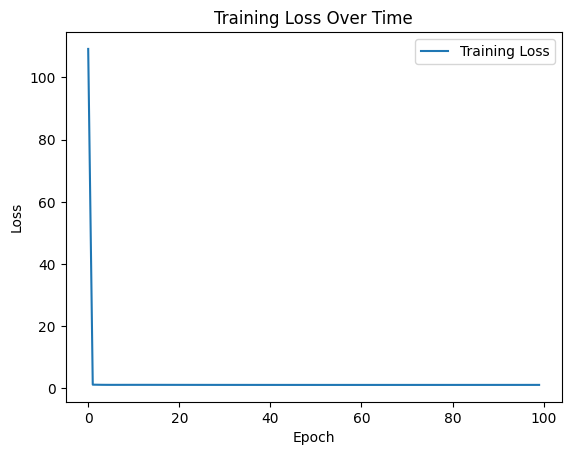

In [181]:
import matplotlib.pyplot as plt

# Plot training loss
plt.plot(history.history['loss'], label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Time')
plt.legend()
plt.show()


In [182]:
y_pred = lstm.predict(X_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


In [185]:
print(f"Shape of y_test: {y_test.shape}")
print(f"Shape of y_pred: {y_pred.shape}")



Shape of y_test: (396,)
Shape of y_pred: (396, 1, 1)


Shape of y_test: (396,)
Shape of y_pred: (396, 1, 1)


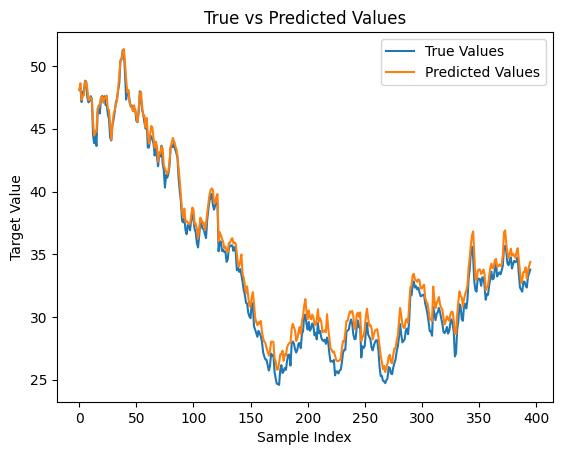

In [186]:
import numpy as np
import matplotlib.pyplot as plt

# Print shapes for debugging
print(f"Shape of y_test: {y_test.shape}")
print(f"Shape of y_pred: {y_pred.shape}")

# If y_pred has shape (396, 2, 1), reshape it to (396,)
y_pred_corrected = y_pred[:, 0, 0]  # Selecting the first prediction for each sample

# Ensure y_pred_corrected has the same length as y_test
assert y_test.shape[0] == y_pred_corrected.shape[0], "Shape mismatch between y_test and y_pred_corrected"

# Create an index array for plotting
indices = range(len(y_test))

# Plot true values
plt.plot(indices, y_test, label='True Values')

# Plot predicted values
plt.plot(indices, y_pred_corrected, label='Predicted Values')

plt.xlabel('Sample Index')
plt.ylabel('Target Value')
plt.title('True vs Predicted Values')
plt.legend()
plt.show()


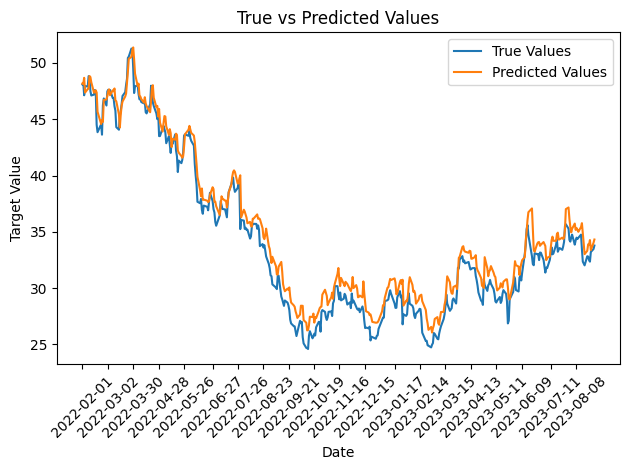

In [141]:
import matplotlib.pyplot as plt

# Exclude the last date from X_test_date to match the lengths
X_test_date_adjusted = X_test_date[:-1]

# Plot true values
plt.plot(X_test_date_adjusted, y_test, label='True Values')

# Plot predicted values
plt.plot(X_test_date_adjusted, y_pred_corrected, label='Predicted Values')

plt.xlabel('Date')
plt.ylabel('Target Value')
plt.title('True vs Predicted Values')
plt.legend()

# Spread the x-axis by showing every nth date
n = 20  # Adjust the value of n to control the spacing of dates
plt.xticks(X_test_date_adjusted[::n], rotation=45)  # Adjust rotation if needed

plt.tight_layout()  # Adjust layout to prevent overlapping labels
plt.show()


Thus, we can see that LSTM can emulate the trends of the stock prices to a certain extent. Based on the recent dip in prices, it has also fit the dropping curve well.

In [187]:
y_pred_flat = y_pred.reshape(-1)

In [189]:
print(y_test.shape, y_pred_flat.shape)

(396,) (396,)


In [193]:
import numpy as np
from sklearn.metrics import mean_squared_error

# Calculate RMSE for each prediction separately
rmse_list = []
mape_list = []
for i in range(y_pred.shape[1]):  # Assuming the second dimension represents different predictions
    y_test_i = y_test.reshape(-1)  # Flatten y_test
    y_pred_i = y_pred[:, i, :].reshape(-1)  # Extract predictions for the ith dimension
    rmse_i = mean_squared_error(y_test_i, y_pred_i, squared=False)  # Calculate RMSE for this dimension
    mape_i = mean_absolute_percentage_error(y_test_i, y_pred_i)
    rmse_list.append(rmse_i)
    mape_list.append(mape_i)

# Print RMSE for each dimension
for i, rmse_i in enumerate(rmse_list):
    print(f"RMSE : {rmse_i:.4f}")
    print(f"MAPE : {mape_i:.4f}")


RMSE : 0.8830
MAPE : 0.0255


In [61]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Initialize the Sequential model
lstm = Sequential()

# Add the first LSTM layer with 50 units
# input_shape=(X_train.shape[1], X_train.shape[2]) specifies the shape of the input data
# activation='relu' sets the activation function to ReLU
# return_sequences=True ensures that the LSTM layer returns the full sequence of outputs
lstm.add(LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2]), activation='relu', return_sequences=True))

# Add a second LSTM layer with 50 units
# activation='relu' sets the activation function to ReLU
# return_sequences is not needed as this is the last LSTM layer
lstm.add(LSTM(50, activation='relu'))

# Add a Dense layer with 1 unit
# This is the output layer that predicts the target value
lstm.add(Dense(1))

# Compile the model
# loss='mean_squared_error' sets the loss function to mean squared error
# optimizer='adam' sets the optimizer to Adam
lstm.compile(loss='mean_squared_error', optimizer='adam')

# Print a summary of the model architecture
lstm.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                        │ (None, 1, 50)               │          10,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_4 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 30,851 (120.51 KB)

 Trainable params: 30,851 (120.51 KB)

 Non-trainable params: 0 (0.00 B)

In [63]:
history2 = lstm.fit(X_train, y_train,
                   epochs=100, batch_size=4,
                   verbose=2, shuffle=False)


Epoch 1/100
397/397 - 10s - 25ms/step - loss: 123.3532
Epoch 2/100
397/397 - 3s - 8ms/step - loss: 0.3895
Epoch 3/100
397/397 - 2s - 5ms/step - loss: 0.4166
Epoch 4/100
397/397 - 3s - 8ms/step - loss: 0.4277
Epoch 5/100
397/397 - 2s - 6ms/step - loss: 0.4271
Epoch 6/100
397/397 - 2s - 6ms/step - loss: 0.4231
Epoch 7/100
397/397 - 2s - 6ms/step - loss: 0.4200
Epoch 8/100
397/397 - 2s - 5ms/step - loss: 0.4187
Epoch 9/100
397/397 - 3s - 8ms/step - loss: 0.4192
Epoch 10/100
397/397 - 2s - 6ms/step - loss: 0.4207
Epoch 11/100
397/397 - 4s - 9ms/step - loss: 0.4224
Epoch 12/100
397/397 - 2s - 6ms/step - loss: 0.4239
Epoch 13/100
397/397 - 2s - 6ms/step - loss: 0.4249
Epoch 14/100
397/397 - 3s - 7ms/step - loss: 0.4255
Epoch 15/100
397/397 - 2s - 4ms/step - loss: 0.4258
Epoch 16/100
397/397 - 3s - 8ms/step - loss: 0.4259
Epoch 17/100
397/397 - 2s - 4ms/step - loss: 0.4258
Epoch 18/100
397/397 - 2s - 4ms/step - loss: 0.4256
Epoch 19/100
397/397 - 3s - 8ms/step - loss: 0.4254
Epoch 20/100
397/

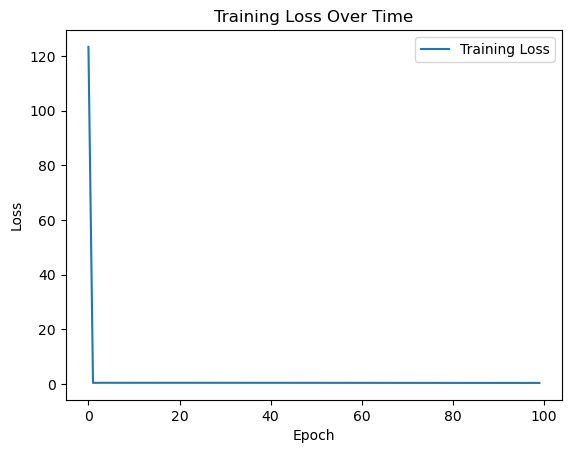

In [65]:
import matplotlib.pyplot as plt

# Plot training loss
plt.plot(history2.history['loss'], label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Time')
plt.legend()
plt.show()


In [66]:
y_pred = lstm.predict(X_test)
# To evaluate, first, we plot the curve for true values and overlap it with that for the predicted values.

13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step


In [67]:
print(f"Shape of y_test: {y_test.shape}")
print(f"Shape of y_pred: {y_pred.shape}")


Shape of y_test: (396,)
Shape of y_pred: (396, 1)


ValueError: x and y must have same first dimension, but have shapes (395,) and (396,)

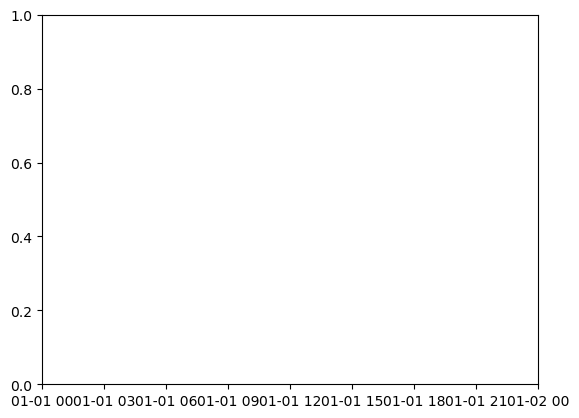

In [68]:
import matplotlib.pyplot as plt

# Exclude the last date from X_test_date to match the lengths
X_test_date_adjusted = X_test_date[:-1]

# Plot true values
plt.plot(X_test_date_adjusted, y_test, label='True Values')

# Plot predicted values
plt.plot(X_test_date_adjusted, y_pred_corrected, label='Predicted Values')

plt.xlabel('Date')
plt.ylabel('Target Value')
plt.title('True vs Predicted Values')
plt.legend()

# Spread the x-axis by showing every nth date
n = 20  # Adjust the value of n to control the spacing of dates
plt.xticks(X_test_date_adjusted[::n], rotation=45)  # Adjust rotation if needed

plt.tight_layout()  # Adjust layout to prevent overlapping labels
plt.show()


In [ ]:
# Calculate the Root Mean Squared Error (RMSE)
# squared=False ensures that the result is the root of the mean squared error
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Calculate the Mean Absolute Percentage Error (MAPE)
mape = mean_absolute_percentage_error(y_test, y_pred)

# Print the RMSE
print('RMSE:', rmse)

# Print the MAPE
print('MAPE:', mape)